# REGRESION LINEAL: Costo de un incidente de seguridad
En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionado con la Cyber Seguridad 

#### Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un indidente de seguridad en base al numero de equipos afectados. El conjnuto de datos es generado de manera aleatoria.

## 1.- Generacion del DataSet


In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1) # Semilla o sentinela
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es : ", len(X))

La longitud del DataSet es :  100


## 2.- Visualizacion del DataSet 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inLine

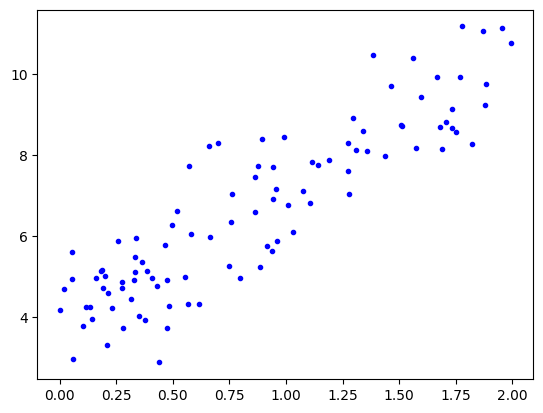

In [3]:
plt.plot(X, y, "b.")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

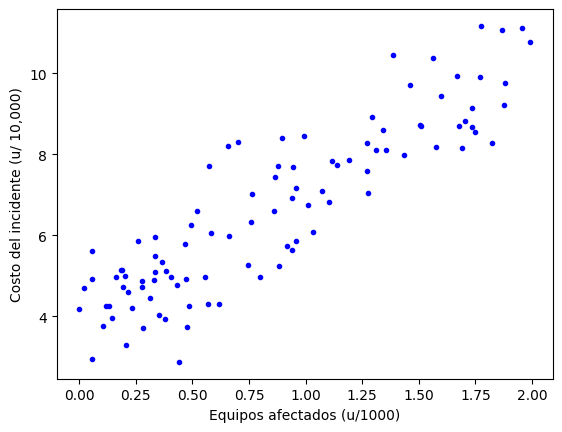

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del incidente (u/ 10,000)")
plt.show

## 3.- Modificacion del DataSet

In [5]:
import pandas as pd
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.276371,7.039011
1,1.293794,8.909751
2,1.705472,8.813322
3,0.193168,4.722524
4,0.571534,7.722181
5,0.893804,8.396272
6,1.031789,6.089883
7,1.311004,8.115163
8,0.520571,6.603599
9,0.568475,4.308612


In [6]:
# Escalando el numero de equipos afectados 
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)

# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)

df.head(10)

,No_Equipos_Afectados,Costo
0,1276,70390
1,1293,89097
2,1705,88133
3,193,47225
4,571,77221
5,893,83962
6,1031,60898
7,1311,81151
8,520,66035
9,568,43086


<function matplotlib.pyplot.show(close=None, block=None)>

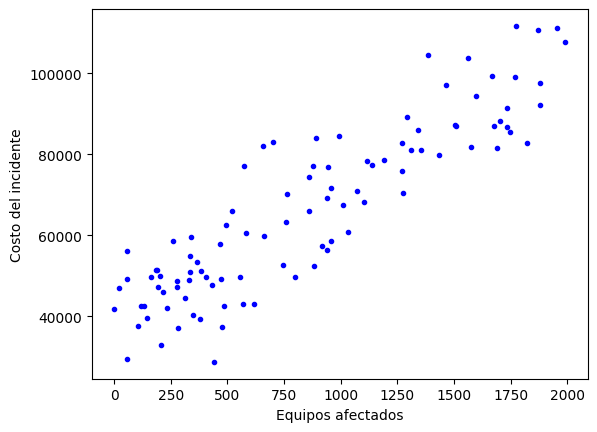

In [7]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show

## 4.-Construccion del modelo 

In [8]:
from sklearn.linear_model import LinearRegression 

In [9]:
# Construccion del modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Parametro Theta 0
lin_reg.intercept_

np.float64(38588.79761129267)

In [11]:
# Parametro Theta 1
lin_reg.coef_

array([32.47752016])

In [12]:
# Prediccion para el valor minimo y maximo del DataSet de entrenamiento
X_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

<function matplotlib.pyplot.show(close=None, block=None)>

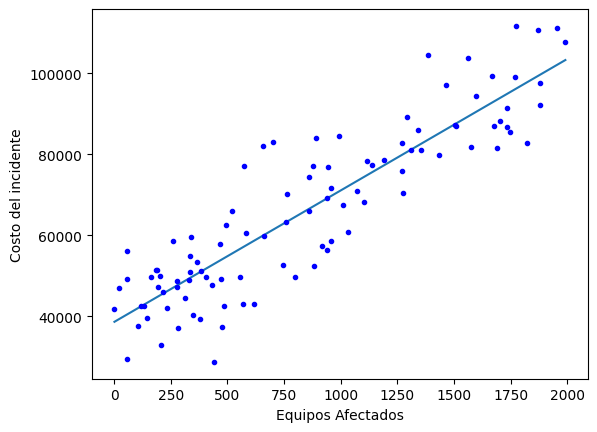

In [13]:
# Representacion grafica de la funcion de hipotesis generada plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred)
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b. ")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show

## 5.- Prediccion de nuevos ejemplos

In [14]:
x_new = np.array([[3000]]) #150 equipos afectados 

# Preccion del costo que tendria el incidente 
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(Costo[0]))

El costo del incidente seria: $ 136021


<function matplotlib.pyplot.show(close=None, block=None)>

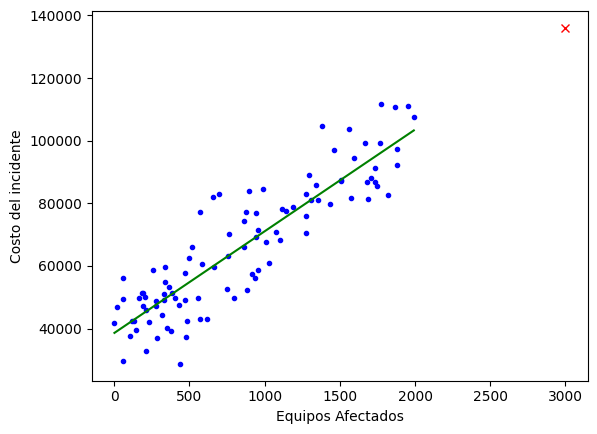

In [15]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b. ")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show